In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
ft_cell_dens_in_norm = np.load('/home/dascim/repos/histograph/data/input/features/001_cell_densities_outside_norm.npy', allow_pickle=True)

In [5]:
ft_cell_dens_in_norm

,tcell _25,tcell _106,tcell _107,tcell _108,cd68,cd163,cd206,ms4a4a
0,0.257025,0.137250,0.184868,0.114819,0.000000,0.066371,0.291277,0.001030
1,0.135442,0.158814,0.168364,0.117144,0.054299,0.145036,0.118012,0.000814
2,0.111499,0.145635,0.182275,0.126289,0.020531,0.129443,0.243805,0.023673
3,0.144996,0.177253,0.169619,0.131961,0.095129,0.043360,0.270561,0.003495
4,0.107625,0.150062,0.156237,0.124611,0.063134,0.056915,0.279453,0.016051
...,...,...,...,...,...,...,...,...
104,0.273011,0.197233,0.272433,0.218574,0.037162,0.107047,0.044047,0.005152
105,0.319537,0.337932,0.343532,0.314880,0.056707,0.318029,0.066525,0.018618
106,0.218846,0.228941,0.253933,0.227141,0.068042,0.162680,0.125074,0.046812
107,0.241547,0.360451,0.380728,0.369360,0.041345,0.020358,0.029522,0.000000


In [6]:
dist_to_glom = np.load("/home/dascim/repos/histograph/data/input/features/002_dist_to_glom_norm.npy", allow_pickle=True)
dist_to_glom

,mean tcell _25,mean tcell _106,mean tcell _107,mean tcell _108,mean cd68,mean cd163,mean cd206,mean ms4a4a,std tcell _25,std tcell _106,std tcell _107,std tcell _108,std cd68,std cd163,std cd206,std ms4a4a
0,0.360457,0.300601,0.429295,0.780689,0.034892,0.132198,0.197701,0.777723,0.301651,0.618265,0.459499,0.944266,0.728202,0.716434,0.844891,0.963472
1,0.511267,0.398584,0.542908,0.804037,0.631419,0.520124,0.691053,0.842337,0.306595,0.438052,0.199910,0.860190,0.347826,0.101805,0.353226,0.830978
2,1.000000,0.512790,0.823616,0.826785,0.987978,1.000000,1.037261,0.929059,0.505674,0.472603,0.571074,0.840289,0.852996,0.563648,0.650464,0.797419
3,0.530099,0.651073,0.621160,0.917329,0.155383,0.645945,0.576543,0.857609,0.508819,0.513242,0.609995,0.929857,0.605523,0.821723,0.884336,0.911778
4,0.516553,0.122318,0.581260,0.733002,0.518034,0.205868,0.502801,0.806949,0.651387,0.774429,0.932875,1.031834,0.590012,0.319981,0.804683,0.875282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.388119,0.303734,0.562190,0.809885,0.651990,0.591452,0.623594,0.860570,0.601168,0.155860,0.817351,0.885232,0.434078,0.184769,0.417738,0.843756
97,0.641790,0.395579,0.734809,0.804997,0.629816,0.419406,0.680288,0.829011,0.716998,0.533029,0.735785,0.910813,0.602820,0.676694,0.869322,0.934560
98,0.420686,0.589785,0.619999,0.820202,0.047235,0.605300,0.379085,0.830133,0.547467,0.772603,0.647225,0.905100,0.151939,0.335814,0.140858,0.827106
99,0.401190,0.353948,0.527392,0.809555,0.584985,0.370044,0.514588,0.803285,0.754971,0.727549,0.876579,0.922969,0.818214,0.549082,0.719430,0.919167


In [7]:
controids = pd.read_pickle('/home/dascim/repos/histograph/data/input/resultats/IFTA_EXC_001_25_centroids.npy')
controids

,centroid,label gt
label,,
1,"[94, 1120]",-1
2,"[134, 977]",-1
3,"[288, 1080]",1
4,"[333, 1317]",-1
5,"[379, 1001]",2
...,...,...
166,"[1909, 1397]",179
167,"[1917, 1270]",180
168,"[1931, 493]",185


In [8]:
controids_from_gt = pd.read_pickle('/home/dascim/repos/histograph/data/input/resultats/IFTA_EXC_001_25_centroids_from_gt.npy')
controids_from_gt

,centroid,label gt
label,,
1,"[288, 1079]",1
2,"[380, 1001]",2
3,"[445, 554]",7
4,"[463, 1006]",4
5,"[465, 602]",8
...,...,...
171,"[1909, 1398]",179
172,"[1918, 1271]",180
173,"[1930, 493]",185


In [9]:
controids_gt = pd.read_pickle('/home/dascim/repos/histograph/data/input/resultats/IFTA_EXC_001_25_gt_centroids.npy')
controids_gt

,centroid
label,
1,"[288, 1079]"
2,"[380, 1001]"
4,"[463, 1006]"
5,"[486, 1092]"
7,"[445, 554]"
...,...
224,"[1223, 1789]"
225,"[1154, 178]"
600,"[986, 1428]"


<Axes: ylabel='Frequency'>

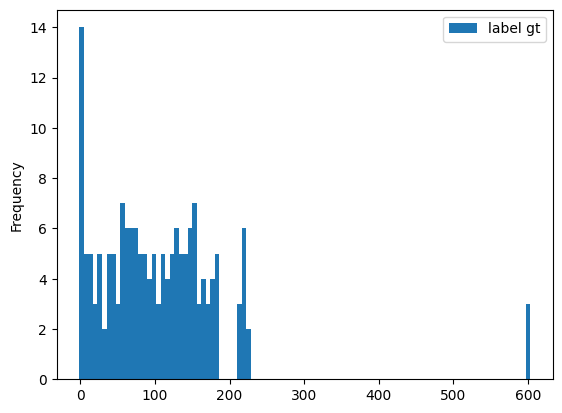

In [10]:
controids.plot.hist(column=['label gt'], bins=100)

In [11]:
matching_centriods = pd.read_pickle('/home/dascim/repos/histograph/data/input/resultats/matching_across_stainings_001.npy')

In [12]:
matching_centriods

,s1,s2,s3,s4
0,5.0,32.0,29.0,28.0
1,6.0,8.0,5.0,6.0
2,7.0,10.0,6.0,7.0
3,8.0,11.0,7.0,10.0
4,10.0,12.0,8.0,9.0
...,...,...,...,...
123,165.0,179.0,169.0,161.0
124,166.0,177.0,167.0,158.0
125,167.0,176.0,168.0,157.0
126,168.0,165.0,164.0,149.0


In [13]:
matching2 = pd.read_pickle('/home/dascim/repos/histograph/data/input/resultats/matching_across_stainings_001_from_gt.npy')

In [14]:
matching2

,s1,s2,s3,s4
0,3,3,3,3
1,5,5,5,5
2,6,6,6,7
3,7,9,9,9
4,8,7,7,6
...,...,...,...,...
152,170,185,177,176
153,171,183,172,173
154,172,182,173,172
155,173,172,169,161


## Matchings results tom

## EDA annotations (scale of the data)

### EXA

In [14]:
df_exa = pd.read_csv('/home/dascim/repos/histograph/data/input/annotations_exa.csv', delimiter=";")

# edit columns
df_exa.drop(['User', 'Annotation thumb', 'Annotation in Cytomine'], axis=1, inplace=True)
df_exa.rename(columns={"Area (microns²)": "area", "Perimeter (mm)": "perimeter"}, inplace=True)

# get patient and staining
df_exa["patient"] = df_exa['Image filename'].str.split('_').str[2]
df_exa['staining'] = df_exa['Image filename'].str.split('_').str[-1]
df_exa['staining'] = df_exa['staining'].str.split('.').str[0]

In [15]:
df_exa.head()

,ID,area,perimeter,Center X,Center Y,Image ID,Image filename,Term,patient,staining
0,1319092,1.304132e+08,368.622910,38648.24,32332.98,92709,IFTA_Nx_0019_13.svs,Tissue,0019,13
1,1319079,2.297246e+05,26.640355,63115.22,35394.79,92709,IFTA_Nx_0019_13.svs,Tissue,0019,13
2,1319066,1.030112e+06,71.368555,65964.75,38798.23,92709,IFTA_Nx_0019_13.svs,Tissue,0019,13
3,1319053,2.929543e+05,19.991924,60092.71,38967.51,92709,IFTA_Nx_0019_13.svs,Tissue,0019,13
4,1319040,1.319759e+05,5.512392,48806.88,47451.03,92709,IFTA_Nx_0019_13.svs,Tissue,0019,13


In [16]:
by_patient = df_exa.groupby("patient")
by_patient["staining"].unique()

patient
0010            [03, 32, 02, 39, 16]
0011            [32, 39, 16, 02, 03]
0012            [32, 39, 16, 03, 02]
0013            [39, 16, 32, 03, 02]
0014            [39, 16, 32, 02, 03]
0015            [02, 32, 39, 16, 03]
0016    [13, 01, 16, 39, 32, 02, 03]
0017    [13, 01, 03, 02, 39, 32, 16]
0018    [13, 01, 03, 16, 39, 32, 02]
0019    [13, 01, 39, 16, 32, 03, 02]
Name: staining, dtype: object

=> Annotations in stainings 13 and 01 only available for patien 16-19. In stainings 02, 03, 16, 32, 39 available for all patients

In [17]:
by_patient_staining = df_exa.groupby(['patient', 'staining'])
df_heatmap = by_patient_staining["ID"].count()

In [18]:
# Pivot the DataFrame to have 'patient' as rows and 'staining' as columns
heatmap_data = df_heatmap.reset_index().pivot(index='patient', columns='staining', values='ID')
heatmap_data.sort_index(ascending=False, inplace=True)
heatmap_data.fillna(0)

staining,01,02,03,13,16,32,39
patient,,,,,,,
0019,80.0,92.0,87.0,80.0,96.0,92.0,91.0
0018,452.0,353.0,337.0,408.0,340.0,346.0,333.0
0017,248.0,241.0,241.0,242.0,203.0,227.0,235.0
0016,400.0,2.0,395.0,396.0,386.0,400.0,373.0
0015,0.0,227.0,222.0,0.0,196.0,227.0,205.0
0014,0.0,196.0,183.0,0.0,154.0,189.0,169.0
0013,0.0,415.0,403.0,0.0,340.0,412.0,401.0
0012,0.0,76.0,80.0,0.0,61.0,83.0,70.0
0011,0.0,169.0,139.0,0.0,119.0,1.0,130.0


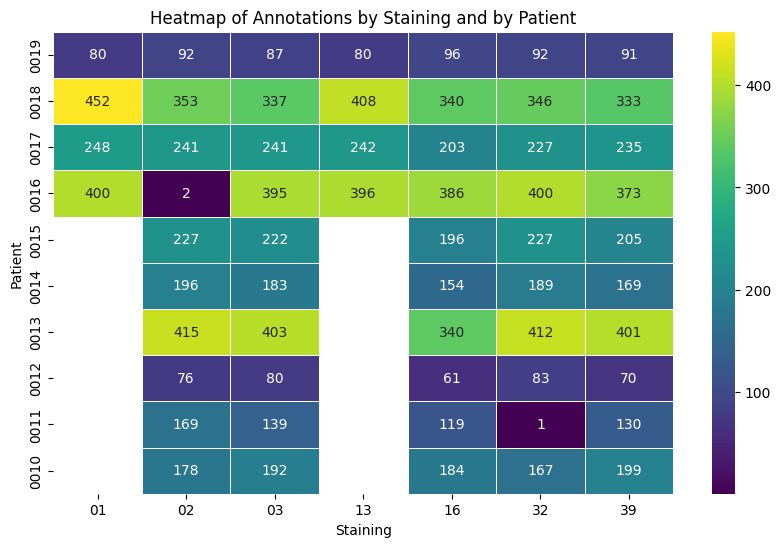

In [19]:
# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Heatmap of Annotations by Staining and by Patient')
plt.xlabel('Staining')
plt.ylabel('Patient')
plt.savefig('exa_by_patients_and_stainings_not_healthy.png')
plt.show()

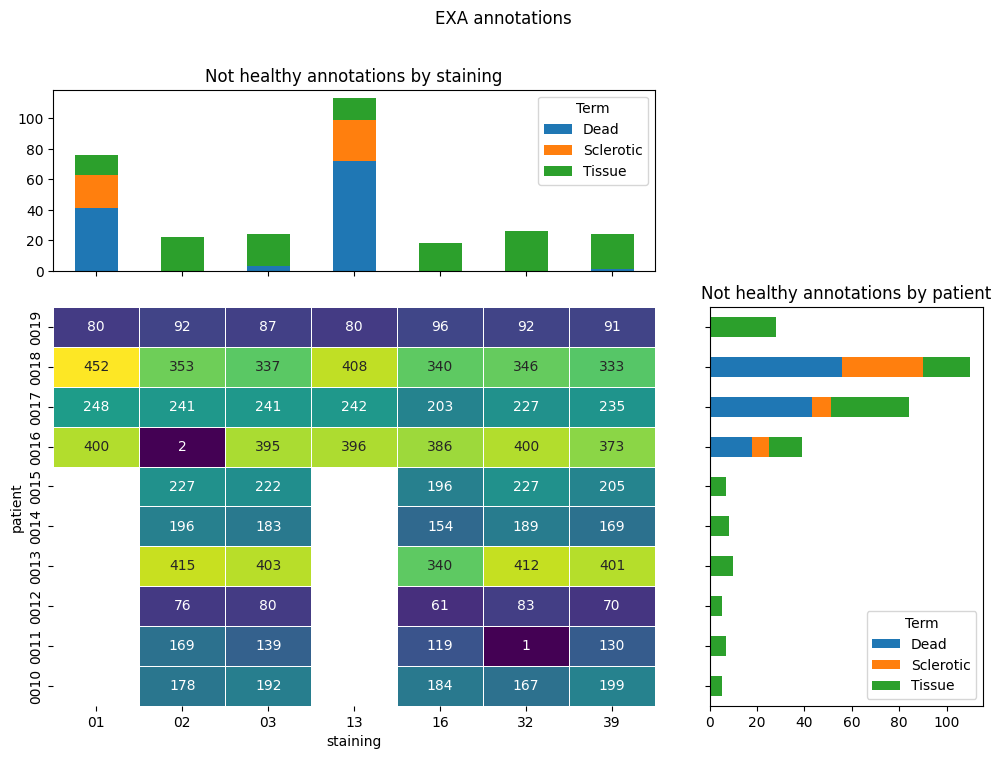

In [20]:
fig=plt.figure(figsize=(12,8))
ax1=plt.subplot2grid((3,3),(0,0), colspan=2)
ax2=plt.subplot2grid((3,3),(1,0), colspan=2, rowspan=2)
ax3=plt.subplot2grid((3,3),(1,2), rowspan=2)

sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=.5, ax=ax2, cbar=False)
df_plot = df_exa[df_exa["Term"] != "Healthy"].groupby(['staining', 'Term']).size().reset_index().pivot(columns='Term', index='staining', values=0)
df_plot.plot(kind='bar', stacked=True, ax=ax1, sharex=True)
ax1.set_title('Not healthy annotations by staining')
df_plot = df_exa[df_exa["Term"] != "Healthy"].groupby(['patient', 'Term']).size().reset_index().pivot(columns='Term', index='patient', values=0)
ax3.set_title('Not healthy annotations by patient')

fig.suptitle("EXA annotations")
df_plot.plot(kind='barh', stacked=True,ax=ax3, sharey=True)
plt.savefig('exa_by_patients_and_stainings_not_healthy.png')
plt.show()

Text(0.5, 1.0, 'Number of Annotations by patient')

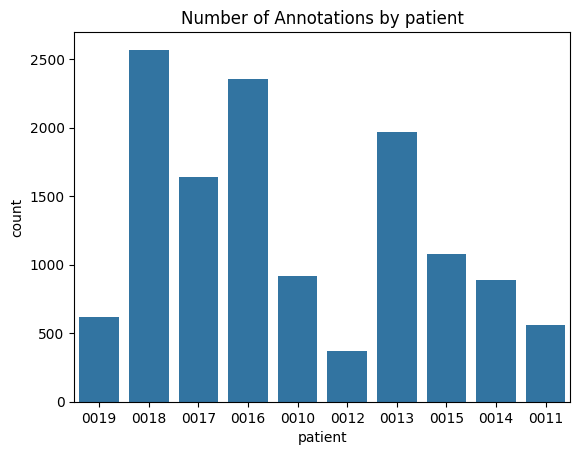

In [21]:
sns.countplot(data=df_exa, x="patient")
plt.title("Number of Annotations by patient")

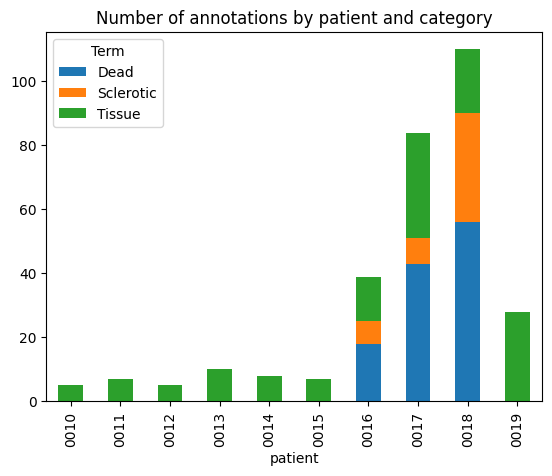

In [22]:
df_plot = df_exa[df_exa["Term"] != "Healthy"].groupby(['patient', 'Term']).size().reset_index().pivot(columns='Term', index='patient', values=0)
df_plot.plot(kind='bar', stacked=True, title='Number of annotations by patient and category')
plt.savefig('exa_by_patients.png')

Text(0.5, 1.0, 'Annotations bei staining')

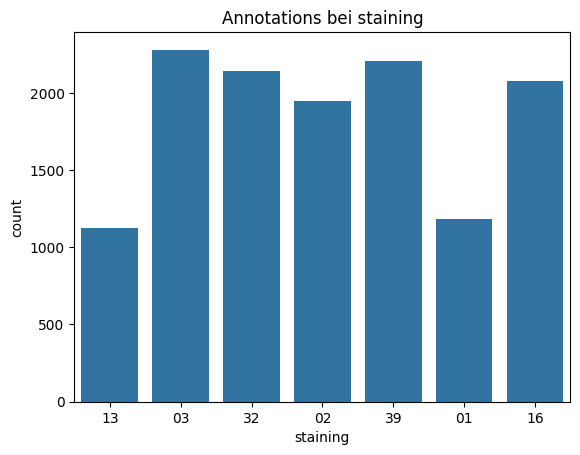

In [23]:
sns.countplot(data=df_exa, x="staining")
plt.title('Annotations bei staining')

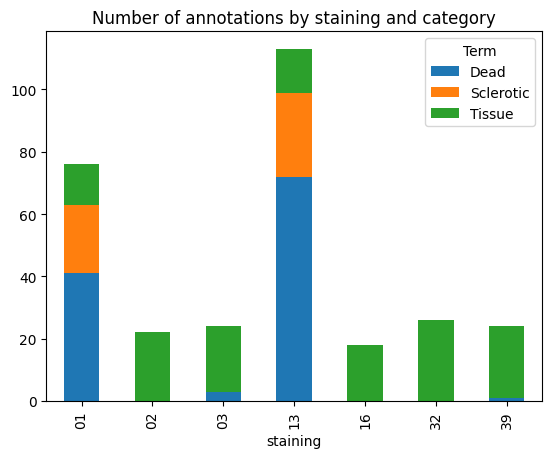

In [24]:
df_plot = df_exa[df_exa["Term"] != "Healthy"].groupby(['staining', 'Term']).size().reset_index().pivot(columns='Term', index='staining', values=0)
df_plot.plot(kind='bar', stacked=True, title='Number of annotations by staining and category')
plt.savefig('exa_by_staining.png')

=> Why are the unhealthy glomeruli only in some stainings?
Most are in the stainings where we have no annotations for patients 10-15

Text(0.5, 1.0, 'Total Annotations by category')

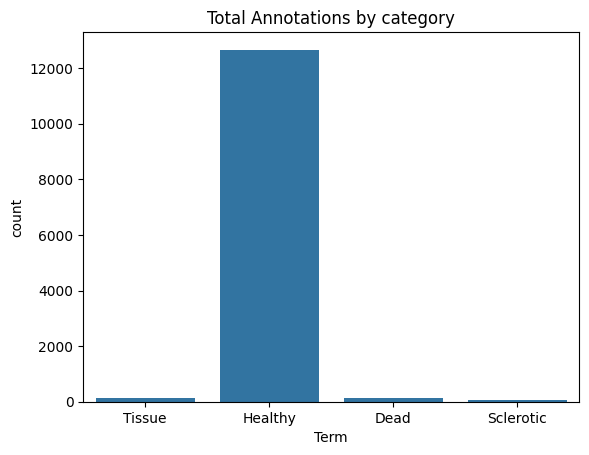

In [25]:
sns.countplot(data=df_exa, x="Term")
plt.title('Total Annotations by category')

### EXC

In [15]:
df_exa = pd.read_csv('/home/dascim/repos/histograph/data/input/annotations_exc.csv', delimiter=";")

Reference Golmeruli for coordinate Transformation

In [16]:
df_exa[df_exa['Annotation in Cytomine'] == 'http://cytomine.icube.unistra.fr/#/project/1407/image/5700/annotation/1327572']

,ID,Area (microns²),Perimeter (mm),Center X,Center Y,Image ID,Image filename,User,Term,Annotation thumb,Annotation in Cytomine
2074,1327572,27037.767664,0.615714,16038.24,69265.17,5700,IFTA_EXC_001_NX_III_10_25.svs,lampert,Healthy,http://cytomine.icube.unistra.fr/api/annotatio...,http://cytomine.icube.unistra.fr/#/project/140...


In [17]:
df_exa[df_exa['Annotation in Cytomine'] == 'http://cytomine.icube.unistra.fr/#/project/1407/image/5700/annotation/1328885']

,ID,Area (microns²),Perimeter (mm),Center X,Center Y,Image ID,Image filename,User,Term,Annotation thumb,Annotation in Cytomine
1973,1328885,15337.847092,0.47777,20133.03,47612.88,5700,IFTA_EXC_001_NX_III_10_25.svs,lampert,Healthy,http://cytomine.icube.unistra.fr/api/annotatio...,http://cytomine.icube.unistra.fr/#/project/140...


In [18]:
df_exa[df_exa['Annotation in Cytomine'] == 'http://cytomine.icube.unistra.fr/#/project/1407/image/5700/annotation/1328248']

,ID,Area (microns²),Perimeter (mm),Center X,Center Y,Image ID,Image filename,User,Term,Annotation thumb,Annotation in Cytomine
2022,1328248,40439.527324,0.7628,5723.02,56453.76,5700,IFTA_EXC_001_NX_III_10_25.svs,lampert,Healthy,http://cytomine.icube.unistra.fr/api/annotatio...,http://cytomine.icube.unistra.fr/#/project/140...


In [19]:
# edit columns
df_exa.drop(['User', 'Annotation thumb', 'Annotation in Cytomine'], axis=1, inplace=True)
df_exa.rename(columns={"Area (microns²)": "area", "Perimeter (mm)": "perimeter"}, inplace=True)

# get patient and staining
df_exa["patient"] = df_exa['Image filename'].str.split('_').str[2]
df_exa['staining'] = df_exa['Image filename'].str.split('_').str[-1]
df_exa['staining'] = df_exa['staining'].str.split('.').str[0]

In [20]:
df_exa.head()

,ID,area,perimeter,Center X,Center Y,Image ID,Image filename,Term,patient,staining
0,1354829,2.422125e+04,0.566451,18364.42,62022.07,13623,IFTA_EXC_001_NX_III_10_106.svs,Healthy,001,106
1,1354812,2.972635e+04,0.629057,17890.31,62467.36,13623,IFTA_EXC_001_NX_III_10_106.svs,Healthy,001,106
2,1354674,1.150714e+08,50.784761,21386.30,41638.80,13623,IFTA_EXC_001_NX_III_10_106.svs,Tissue,001,106
3,1354653,1.546308e+04,0.462972,17944.09,3422.46,13623,IFTA_EXC_001_NX_III_10_106.svs,Dead,001,106
4,1354640,6.194769e+03,0.298435,29819.91,9208.72,13623,IFTA_EXC_001_NX_III_10_106.svs,Dead,001,106


In [21]:
by_patient = df_exa.groupby("patient")
by_patient["staining"].unique()

patient
001    [106, 107, 108, 25, 32]
002        [25, 107, 106, 108]
003        [108, 107, 106, 25]
004        [106, 107, 108, 25]
005        [107, 108, 106, 25]
006        [108, 107, 106, 25]
Name: staining, dtype: object

In [22]:
by_patient_staining = df_exa.groupby(['patient', 'staining'])
df_heatmap = by_patient_staining["ID"].count()

In [23]:
# Pivot the DataFrame to have 'patient' as rows and 'staining' as columns
heatmap_data = df_heatmap.reset_index().pivot(index='patient', columns='staining', values='ID')
heatmap_data.sort_index(ascending=False, inplace=True)
heatmap_data.fillna(0)

staining,106,107,108,25,32
patient,,,,,
006,5.0,5.0,6.0,6.0,0.0
005,2.0,2.0,2.0,2.0,0.0
004,288.0,302.0,273.0,276.0,0.0
003,141.0,141.0,131.0,107.0,0.0
002,270.0,280.0,271.0,284.0,0.0
001,544.0,508.0,507.0,517.0,1.0


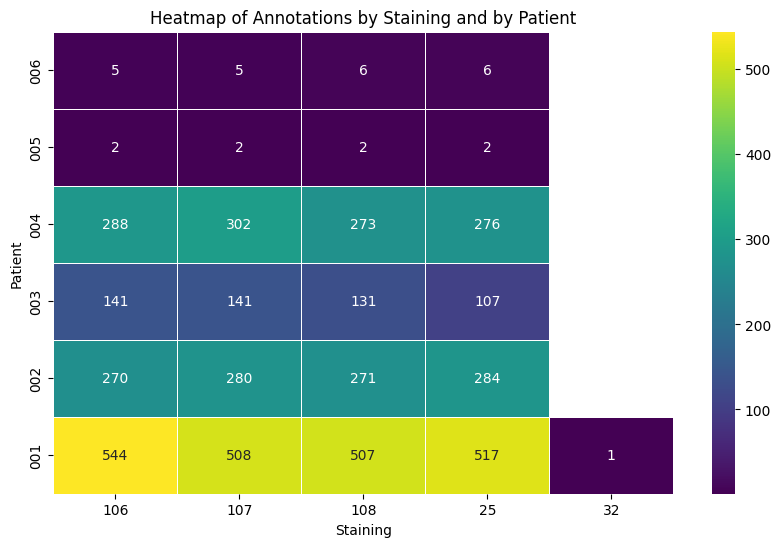

In [24]:
# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Heatmap of Annotations by Staining and by Patient')
plt.xlabel('Staining')
plt.ylabel('Patient')
plt.show()

-> Patients 005 and 006 should be ignored due to lack of annotations

-> That one sample in staining one might be a error

Text(0.5, 1.0, 'Number of Annotations by patient')

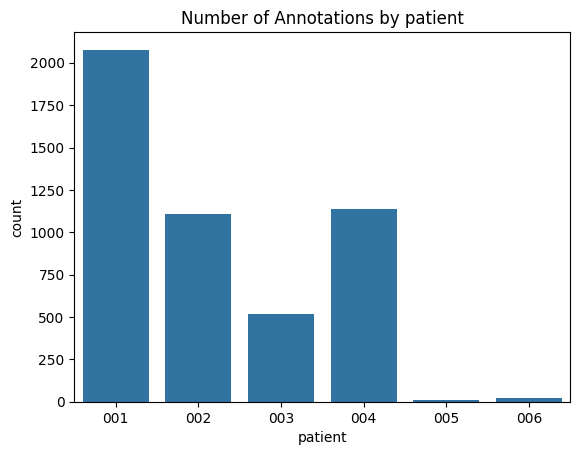

In [25]:
sns.countplot(data=df_exa, x="patient", order=["001", "002", "003","004","005","006"])
plt.title("Number of Annotations by patient")

<Axes: title={'center': 'Number of annotations by patient and category'}, xlabel='patient'>

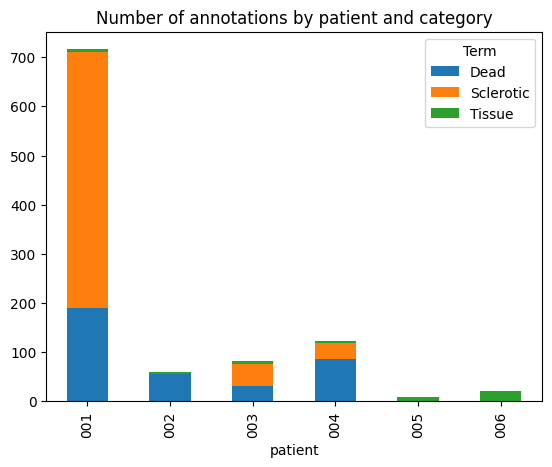

In [26]:
df_plot = df_exa[df_exa["Term"] != "Healthy"].groupby(['patient', 'Term']).size().reset_index().pivot(columns='Term', index='patient', values=0)
df_plot.plot(kind='bar', stacked=True, title='Number of annotations by patient and category')

In [27]:
df_exa[(df_exa["Term"] != "Healthy")&(df_exa["staining"] == str(25))]

,ID,area,perimeter,Center X,Center Y,Image ID,Image filename,Term,patient,staining
1209,1338826,1.171956e+08,50.670662,23258.35,39370.90,5700,IFTA_EXC_001_NX_III_10_25.svs,Tissue,001,25
1210,1338813,2.550336e-01,0.002438,18994.24,74894.57,5700,IFTA_EXC_001_NX_III_10_25.svs,Tissue,001,25
1561,1334249,8.114658e+03,0.350996,22896.27,1201.91,5700,IFTA_EXC_001_NX_III_10_25.svs,Dead,001,25
1562,1334236,1.070937e+04,0.397119,29051.49,4399.75,5700,IFTA_EXC_001_NX_III_10_25.svs,Dead,001,25
1563,1334223,9.061343e+03,0.368995,27088.19,6478.92,5700,IFTA_EXC_001_NX_III_10_25.svs,Dead,001,25
...,...,...,...,...,...,...,...,...,...,...
4629,984918,1.512390e+04,0.476436,88777.86,21694.25,36886,IFTA_EXC_004_NX_NE3_25.svs,Sclerotic,004,25
4630,984905,1.532665e+04,0.498518,75570.16,29360.25,36886,IFTA_EXC_004_NX_NE3_25.svs,Sclerotic,004,25
4631,984892,2.856067e+04,0.633555,63731.80,38509.92,36886,IFTA_EXC_004_NX_NE3_25.svs,Sclerotic,004,25
4632,984879,1.612425e+04,0.491611,60975.93,39887.79,36886,IFTA_EXC_004_NX_NE3_25.svs,Sclerotic,004,25


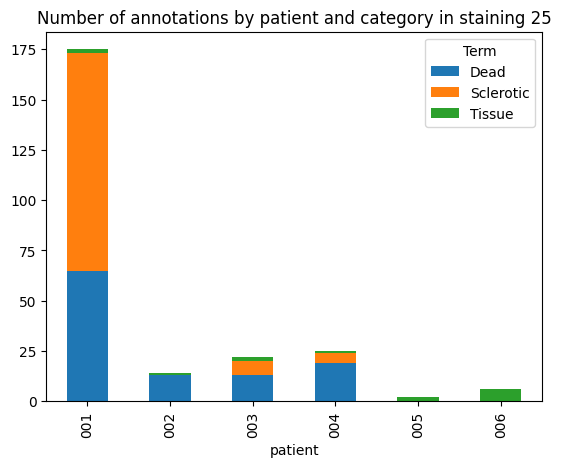

In [28]:
df_plot = df_exa[(df_exa["Term"] != "Healthy")&(df_exa["staining"] == str(25))].groupby(['patient', 'Term']).size().reset_index().pivot(columns='Term', index='patient', values=0)
df_plot.plot(kind='bar', stacked=True, title='Number of annotations by patient and category in staining 25')
plt.savefig('exa_by_patient.png')

Text(0.5, 1.0, 'Annotations bei staining')

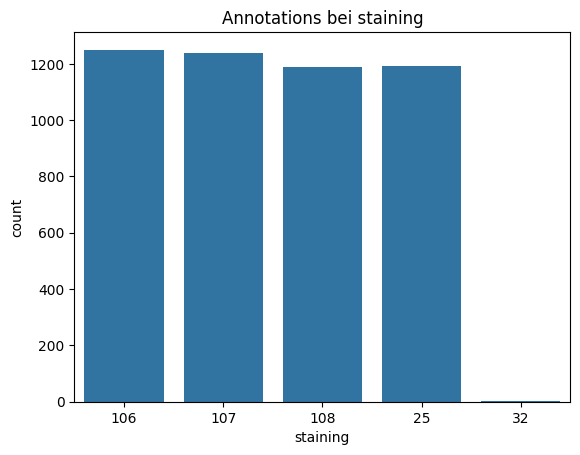

In [29]:
sns.countplot(data=df_exa, x="staining")
plt.title('Annotations bei staining')

<Axes: title={'center': 'Number of annotations by staining and category'}, xlabel='staining'>

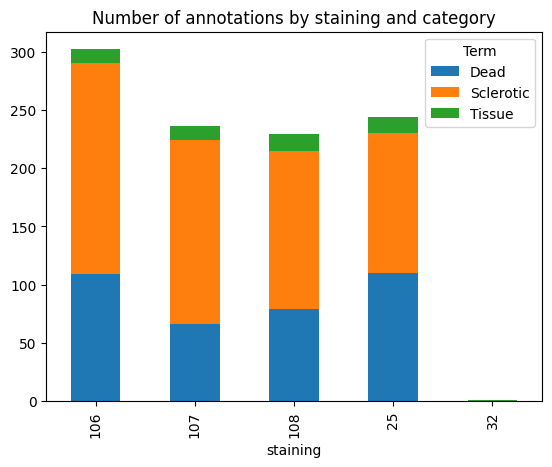

In [30]:
df_plot = df_exa[df_exa["Term"] != "Healthy"].groupby(['staining', 'Term']).size().reset_index().pivot(columns='Term', index='staining', values=0)
df_plot.plot(kind='bar', stacked=True, title='Number of annotations by staining and category')

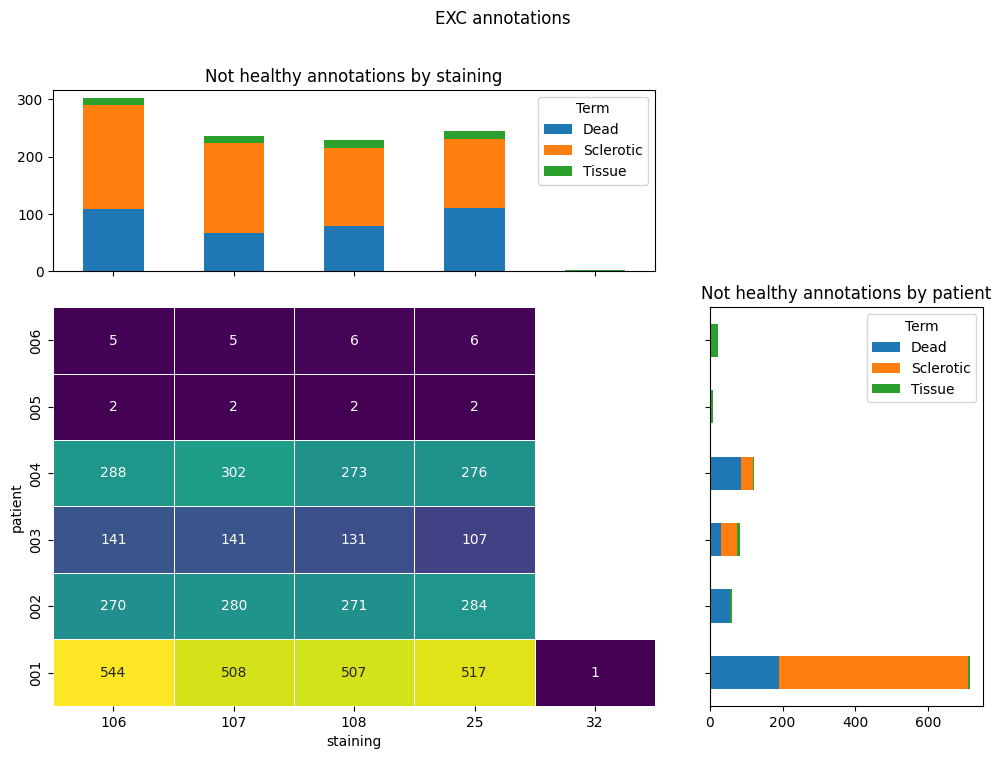

In [31]:
fig=plt.figure(figsize=(12,8))
ax1=plt.subplot2grid((3,3),(0,0), colspan=2)
ax2=plt.subplot2grid((3,3),(1,0), colspan=2, rowspan=2)
ax3=plt.subplot2grid((3,3),(1,2), rowspan=2)

sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=.5, ax=ax2, cbar=False)
df_plot = df_exa[df_exa["Term"] != "Healthy"].groupby(['staining', 'Term']).size().reset_index().pivot(columns='Term', index='staining', values=0)
df_plot.plot(kind='bar', stacked=True, ax=ax1, sharex=True)
ax1.set_title('Not healthy annotations by staining')
df_plot = df_exa[df_exa["Term"] != "Healthy"].groupby(['patient', 'Term']).size().reset_index().pivot(columns='Term', index='patient', values=0)
ax3.set_title('Not healthy annotations by patient')

fig.suptitle("EXC annotations")
df_plot.plot(kind='barh', stacked=True,ax=ax3, sharey=True)
plt.savefig('exc_by_patients_and_stainings_not_healthy.png')
plt.show()

=> Overall the distribution of dead and sclerotic glomeruli over patients and stainings seems much more smooth in the EXC dataset, why we should focus on this set for initial experiments.

Text(0.5, 1.0, 'Total numbers of annotations')

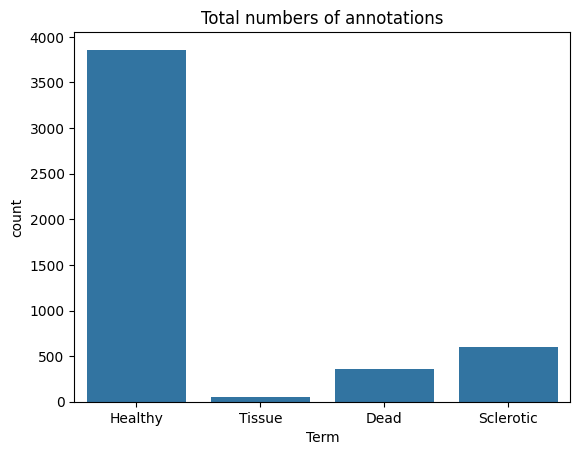

In [32]:
sns.countplot(data=df_exa, x="Term")
plt.title('Total numbers of annotations')

In [ ]:
g = sns.FacetGrid(df_exa, col="patient",  row="staining")
g.map(sns.countplot, "Term")

## Neighborhood EDA

In [ ]:
df_exc = df_exa.copy()

In [ ]:
df_exc = df_exc[(df_exc['patient'] != '005')]
df_exc = df_exc[(df_exc['patient'] != '006')]
df_exc = df_exc[df_exc['staining'] != '32']

In [ ]:
df_exc

In [ ]:
df_exc['Term'].unique()

In [ ]:
n_neighbors_list = [5, 10, 20]
patients = df_exc['patient'].unique()
stainings = df_exc['staining'].unique()

col_names = ['patient', 'staining', 'Term']
new_col_names = [f'dead n={n}' for n in n_neighbor_list]
new_col_names.extend([f'sclerotic n={n}' for n in n_neighbor_list])
all_col_names = col_names
all_col_names.extend(new_col_names)

results = pd.DataFrame([], columns=new_col_names)

for patient in patients:
    for staining in stainings:
        # Get the samples for the selected patient and staining
        df_subset = df_exc[(df_exc['patient'] == patient) & (df_exc['staining'] == staining)]

        # Get all unhealthy gloms from this patient in this staining
        df_unhealthy = df_subset[(df_subset['Term'] == 'Dead') | (df_subset['Term'] == 'Sclerotic')].reset_index(drop=True)

        for col in new_col_names:
            df_unhealthy[col] = 0 

        for n_neighbors in n_neighbors_list:

            # Fit the NN model to all samples
            neighbors_model = NearestNeighbors(n_neighbors=n_neighbors+1)
            neighbors_model.fit(df_subset[['Center X', 'Center Y']])
            
            # Get all neighbors
            distances, indices = neighbors_model.kneighbors(df_unhealthy[['Center X', 'Center Y']])
            
            # Iterate over all unhealthy samples
            for _ in range(len(df_unhealthy)):
                
                count_dead = sum([1 for idx in indices[_][1:] if df_subset.iloc[idx]['Term'] == 'Dead'])
                count_sclerotic = sum([1 for idx in indices[_][1:] if df_subset.iloc[idx]['Term'] == 'Sclerotic'])
                
                df_unhealthy.at[_, f'dead n={n_neighbors}'] = count_dead
                df_unhealthy.at[_, f'sclerotic n={n_neighbors}'] = count_sclerotic

        results = pd.concat([results, df_unhealthy[all_col_names]])
            

    


In [ ]:
results.head()

In [ ]:
by_p_s_t = results.groupby(["patient", 'staining', 'Term'])

In [ ]:
by_p_s_t.mean()

In [ ]:
results.iloc[:, :6].mean()

In [ ]:
by_patient.mean().reset_index(drop=True)

In [ ]:
by_patient = results.iloc[:, [0,1,2,6]].groupby("patient")
sns.heatmap(by_patient.mean().astype(float), cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Mean number of dead golmeruli in the neighborhood of other unhealthy glomeruli (dead and sclerotic)')

In [ ]:
by_patient = results.iloc[:, [3,4,5,6]].groupby("patient")
sns.heatmap(by_patient.mean().astype(float), cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Mean number of sclerotic golmeruli in the neighborhood of other unhealthy glomeruli (dead and sclerotic)')

In [ ]:
by_patient = results.drop(['staining', 'Term'], axis=1).groupby(['patient'])
plot_data = by_patient.mean() #.pivot(index="Term", columns="patient", values=new_col_names)
plot_data
#.groupby("patient")
#by_patient.mean().plot(kind="bar")

In [ ]:
x = np.arange(plot_data.shape[1])  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (10,6))

for _, row in plot_data.iterrows():
    offset = width * multiplier
    rects = ax.bar(x + offset, row, width, label=_)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean number of glomeruli')
ax.set_xlabel('Neighborhood size')
ax.set_title('Number of unhealthy golmeruli in Neighborhood by patient')
ax.set_xticks(x + width, plot_data.columns)
ax.legend(loc='upper left', ncols=3)
#ax.set_ylim(0, 250)

plt.show()

-> for the Neighborhood of dead glom, there seems to be no big difference

-> Seem is a big difference in the neighborhood of sclerotic glom between patients. There reason for the if the overall variing number of sclerotic glom between patients

In [ ]:
plt.figure(figsize=(12, 6))
by_staining = results.drop(['patient', 'Term'], axis=1).groupby("staining")
sns.heatmap(by_staining.mean().astype(float), cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Mean number of unhealthy golmeruli in the neighborhood of other unhealthy glomeruli by staining')

In [ ]:
by_staining = results.drop(['Term', 'patient'], axis=1).groupby(['staining'])
plot_data = by_staining.mean() 

x = np.arange(plot_data.shape[1])  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (10,6))

for _, row in plot_data.iterrows():
    offset = width * multiplier
    rects = ax.bar(x + offset, row, width, label=_)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean number of glomeruli')
ax.set_xlabel('Neighborhood size')
ax.set_title('Number of unhealthy golmeruli in Neighborhood by staining')
ax.set_xticks(x + width, plot_data.columns)
ax.legend(loc='upper left', ncols=3)
#ax.set_ylim(0, 250)

plt.show()

-> Differences can be explained by the differences between the number of dead glom per staining in general

In [ ]:
plt.figure(figsize=(12, 6))
by_term = results.drop(['patient', 'staining'], axis=1).groupby("Term")
sns.heatmap(by_term.mean().astype(float), cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Mean number of unhealthy golmeruli in the neighborhood of other unhealthy glomeruli by category')

In [ ]:
by_term = results.drop(['staining', 'patient'], axis=1).groupby(['Term'])
plot_data = by_term.mean() 

x = np.arange(plot_data.shape[1])  # the label locations
width = 0.3333  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (10,6))

for _, row in plot_data.iterrows():
    offset = width * multiplier
    rects = ax.bar(x + offset, row, width, label=_)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean number of glomeruli')
ax.set_xlabel('Neighborhood size')
ax.set_title('Number of unhealthy golmeruli in Neighborhood by Healthiness')
ax.set_xticks(x + width, plot_data.columns)
ax.legend(loc='upper left', ncols=3)
#ax.set_ylim(0, 250)

plt.show()

-> Dead Glom have more dead glom in Neighborhood and sclerotic more sclerotic

-> Dead Glom seem to be more isolated then sclerotic (?) Or is this an effect from having more sclerotic golmeruli in total?